# Reporte de Análisis VIII

## Identificando y Excluyendo Outliers

In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [27]:
datos = pd.read_csv('alquiler_residencial_filtradoSinNulos.csv', sep = ';')
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN,70.00,Casa
2,Casa en condominio,Ate,5,4,5,750,22000.0,NaN,NaN,29.33,Casa
3,Casa en condominio,El Agustino,2,2,0,65,1000.0,NaN,NaN,15.38,Casa
4,Habitación,San Borja,1,0,0,27,1800.0,501.0,NaN,66.67,Departamento
5,Casa en condominio,San Luis,3,1,1,115,2000.0,NaN,NaN,17.39,Casa
6,Casa en condominio,Ate,4,3,2,466,7500.0,2695.0,NaN,16.09,Casa
7,Casa,Lince,4,1,2,400,12000.0,NaN,NaN,30.00,Casa
8,Habitación,San Borja,1,0,0,27,1300.0,380.0,53.0,48.15,Departamento
9,Casa en condominio,Ate,5,10,5,1600,25000.0,1600.0,NaN,15.62,Casa


In [28]:
datos.describe().round(0)

,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2
count,3313.0,3313.0,3313.0,3313.0,3311.0,2009.0,1916.0,3311.0
mean,3.0,2.0,1.0,253.0,7167.0,900.0,1712.0,33.0
std,2.0,3.0,2.0,309.0,16489.0,1856.0,4134.0,90.0
min,0.0,0.0,0.0,10.0,100.0,1.0,1.0,2.0
25%,1.0,0.0,0.0,38.0,1100.0,360.0,47.0,17.0
50%,2.0,1.0,0.0,110.0,2200.0,537.0,341.0,25.0
75%,4.0,3.0,2.0,370.0,10000.0,1150.0,1382.0,40.0
max,27.0,50.0,14.0,4500.0,800000.0,75000.0,51784.0,4908.0


(100.0, 800000.0)

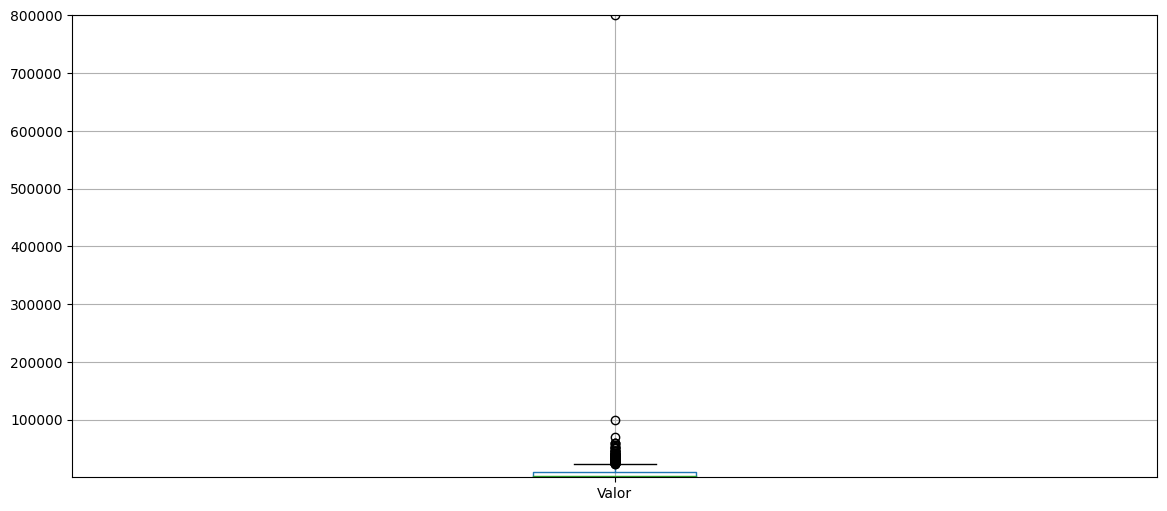

In [29]:
datos.boxplot(['Valor']).set_ylim((datos.Valor.min(), datos.Valor.max()))

In [30]:
datos[datos['Valor'] >= 100000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
1580,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,NaN,4907.98,Casa
2823,Casa comercial,Comas,0,0,0,500,100000.0,NaN,2000.0,200.00,Departamento


In [31]:
valor = datos['Valor']

In [32]:
Q1 = valor.quantile(.25)#Cuartil
Q3 = valor.quantile(.75)#Tercer cuartil     Q2=valor.quantile(.50)#Mediana
IIQ = Q3 - Q1#Intervalo Inter Cuartil       IIQ = Q2#Intervalo Inter Cuartil 
limite_inferior = Q1 - 1.5 * IIQ           #limite_inferior = Q1 - 1.5 * IIQ 
limite_superior = Q3 + 1.5 * IIQ           #limite_superior = Q3 - 1.5 * IIQ

In [33]:
seleccion = (valor >= limite_inferior) & (valor <= limite_superior)
datos_new = datos[seleccion]

<Axes: >

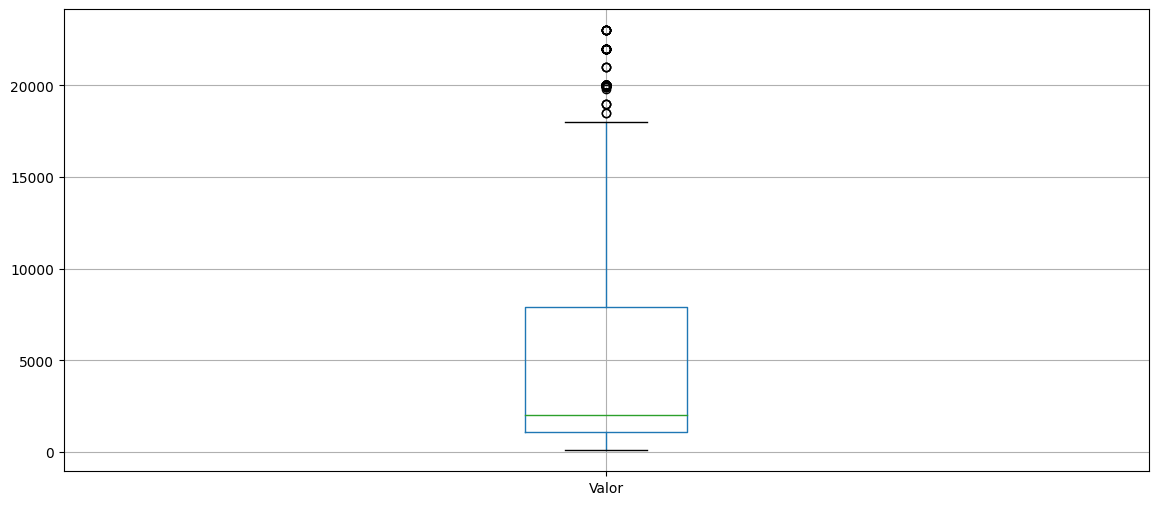

In [34]:
datos_new.boxplot(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

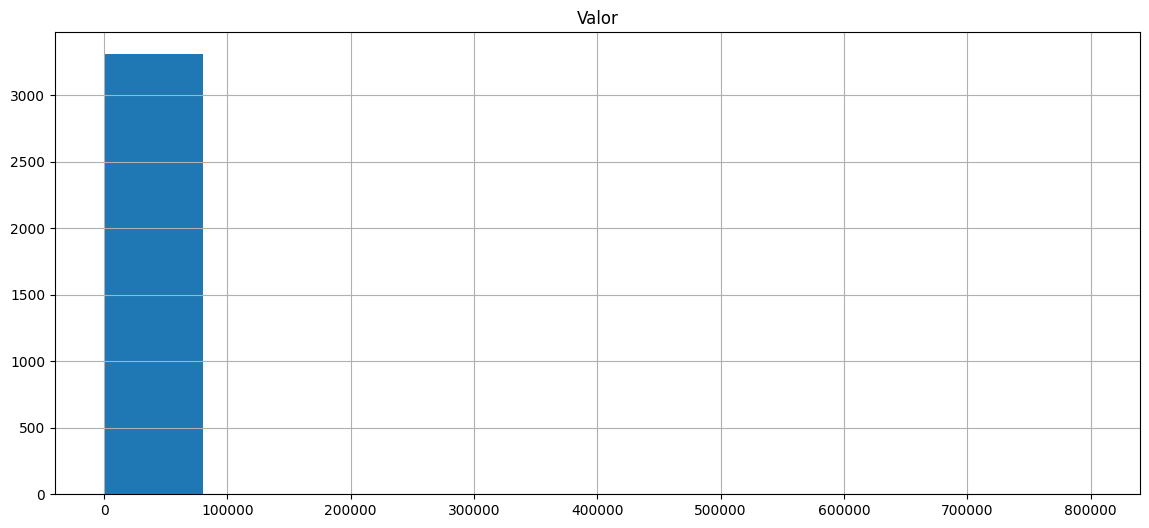

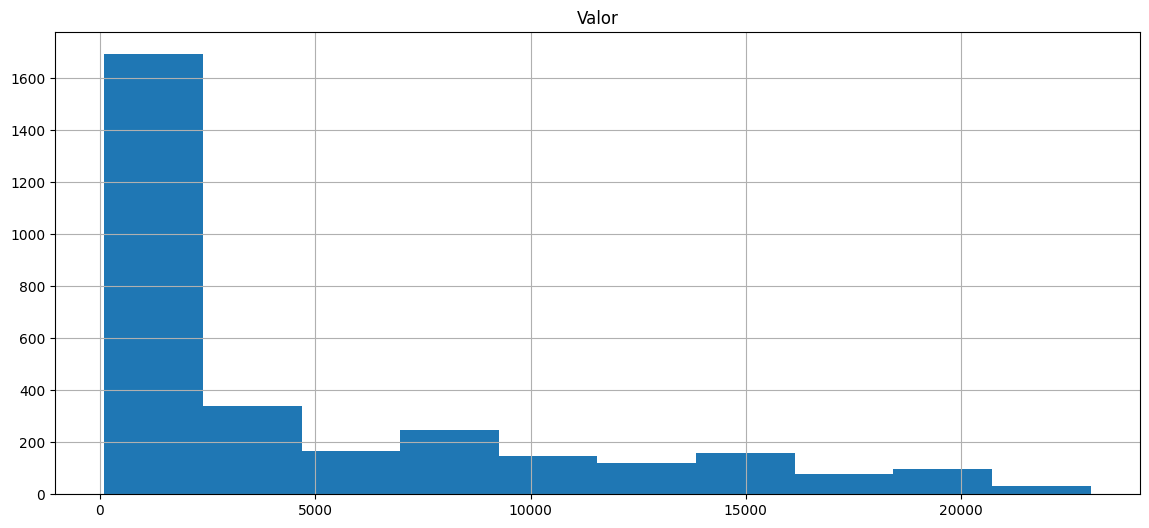

In [35]:
datos.hist(['Valor'])
datos_new.hist(['Valor'])

## Identificando y Excluyendo Outliers (continuación)

(100.0, 800000.0)

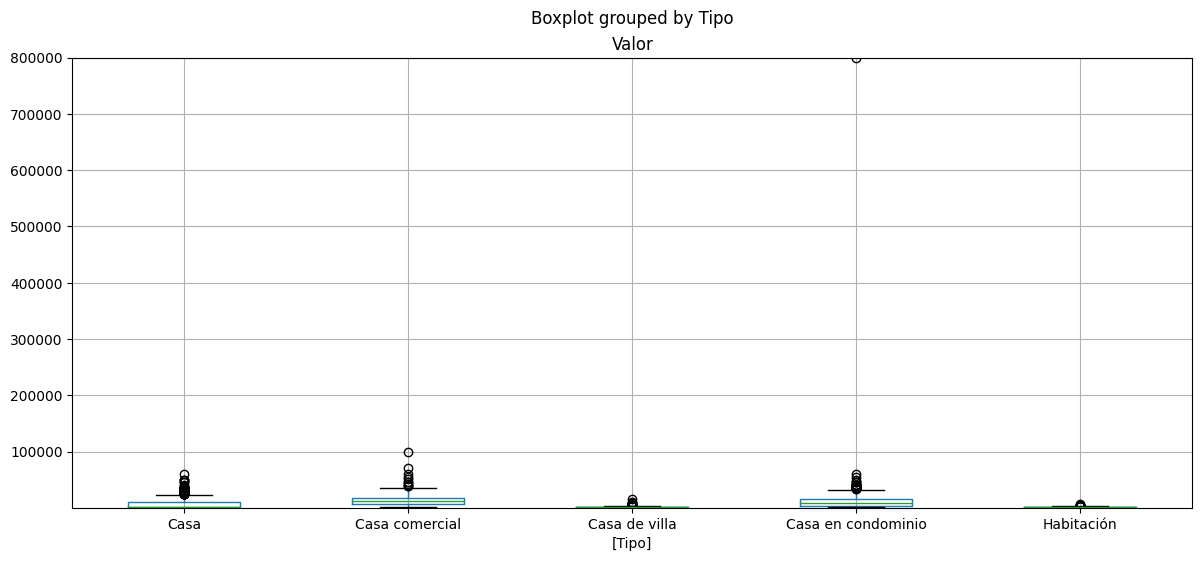

In [36]:
datos.boxplot(['Valor'], by = ['Tipo']).set_ylim((datos.Valor.min(), datos.Valor.max()))

In [37]:
grupo_tipo = datos.groupby('Tipo')['Valor']

In [38]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [39]:
grupo_tipo.groups

{'Casa': [1, 7, 10, 11, 18, 19, 23, 25, 29, 39, 42, 43, 45, 48, 53, 55, 59, 61, 64, 65, 66, 68, 70, 74, 80, 81, 82, 86, 88, 89, 92, 94, 95, 97, 99, 101, 103, 104, 108, 111, 114, 116, 118, 120, 121, 123, 131, 134, 146, 154, 163, 164, 171, 172, 173, 177, 181, 194, 195, 201, 204, 206, 212, 219, 220, 221, 225, 226, 229, 230, 232, 244, 247, 252, 255, 256, 257, 259, 260, 265, 267, 273, 280, 282, 286, 290, 292, 294, 296, 298, 301, 302, 304, 308, 309, 310, 312, 320, 322, 323, ...], 'Casa comercial': [12, 22, 32, 56, 78, 83, 91, 93, 98, 105, 119, 122, 128, 137, 138, 139, 150, 165, 184, 198, 213, 215, 222, 236, 238, 275, 295, 318, 370, 372, 375, 381, 384, 390, 394, 406, 417, 432, 457, 458, 464, 474, 482, 488, 489, 492, 496, 523, 557, 565, 574, 583, 587, 667, 680, 701, 704, 716, 727, 733, 737, 746, 752, 756, 786, 794, 795, 796, 806, 813, 827, 847, 857, 861, 871, 893, 894, 906, 907, 910, 925, 926, 931, 939, 959, 960, 969, 970, 973, 990, 994, 1012, 1019, 1032, 1040, 1072, 1078, 1093, 1105, 1108, ..

In [40]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [41]:
Q1

Tipo
Casa                  1100.0
Casa comercial        6000.0
Casa de villa          750.0
Casa en condominio    4000.0
Habitación             900.0
Name: Valor, dtype: float64

In [42]:
Q3

Tipo
Casa                   9800.0
Casa comercial        18000.0
Casa de villa          1800.0
Casa en condominio    15250.0
Habitación             1500.0
Name: Valor, dtype: float64

In [43]:
IIQ

Tipo
Casa                   8700.0
Casa comercial        12000.0
Casa de villa          1050.0
Casa en condominio    11250.0
Habitación              600.0
Name: Valor, dtype: float64

In [44]:
limite_inferior

Tipo
Casa                 -11950.0
Casa comercial       -12000.0
Casa de villa          -825.0
Casa en condominio   -12875.0
Habitación                0.0
Name: Valor, dtype: float64

In [45]:
limite_superior

Tipo
Casa                  22850.0
Casa comercial        36000.0
Casa de villa          3375.0
Casa en condominio    32125.0
Habitación             2400.0
Name: Valor, dtype: float64

In [46]:
limite_superior['Casa']

22850.0

In [47]:
datos_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = datos['Tipo'] == tipo
    eh_dentro_limite = (datos['Valor'] >= limite_inferior[tipo]) & (datos['Valor'] <= limite_superior[tipo])
    seleccion = eh_tipo & eh_dentro_limite
    datos_seleccion = datos[seleccion]
    datos_new = pd.concat([datos_new, datos_seleccion])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

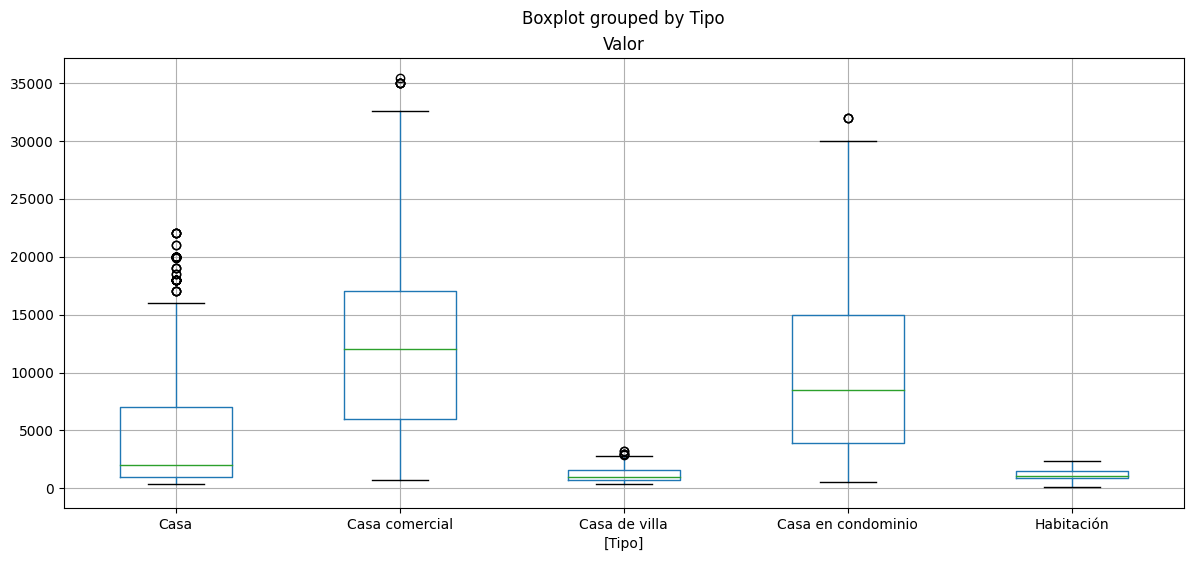

In [48]:
datos_new.boxplot(['Valor'], by = ['Tipo'])

In [49]:
datos_new.to_csv('alquiler_residencial_sin_outliers.csv', sep = ';', index = False)